<a href="https://www.kaggle.com/code/abdelrahmanwael1029/deep-learning-a-z-ann?scriptVersionId=156269552" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deep-learning-az-ann/Churn_Modelling.csv


In [4]:
df = pd.read_csv('/kaggle/input/deep-learning-az-ann/Churn_Modelling.csv', index_col = 'RowNumber')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [8]:
df.describe(include='object').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

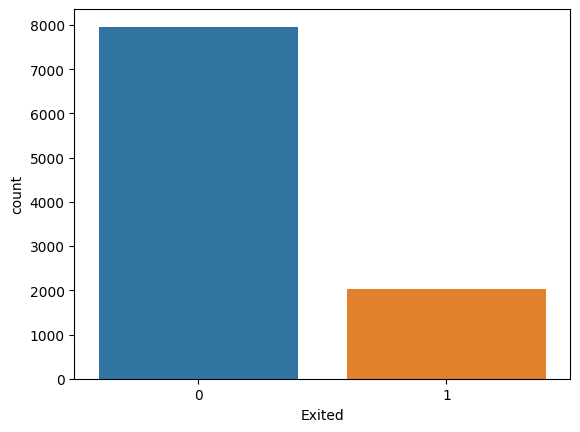

In [44]:
sns.countplot(df, x = 'Exited')

<Axes: xlabel='Exited', ylabel='CreditScore'>

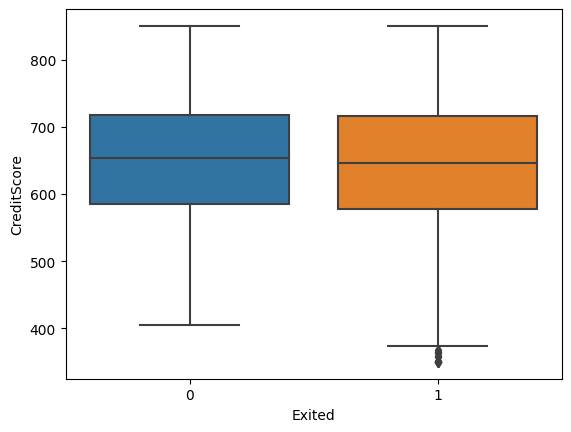

In [14]:
sns.boxplot(df, y = 'CreditScore', x = 'Exited')

<Axes: xlabel='Geography', ylabel='count'>

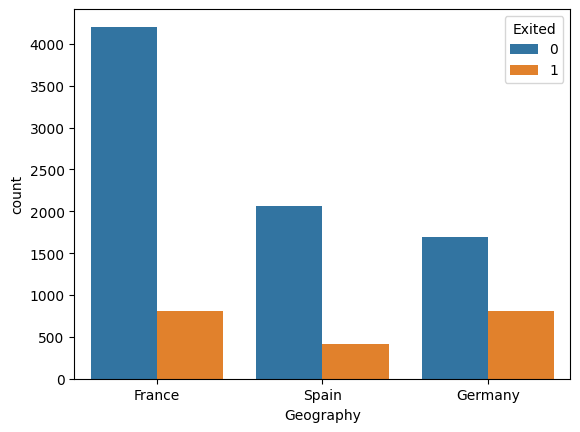

In [17]:
sns.countplot(df, x = 'Geography', hue = 'Exited')

<Axes: xlabel='Gender', ylabel='count'>

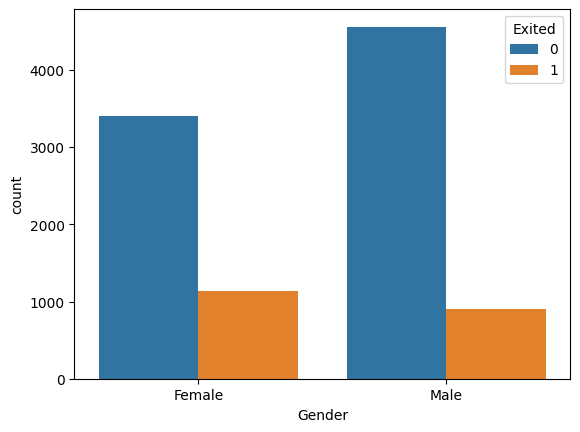

In [46]:
sns.countplot(df, x = 'Gender', hue = 'Exited')

<Axes: xlabel='Age', ylabel='Count'>

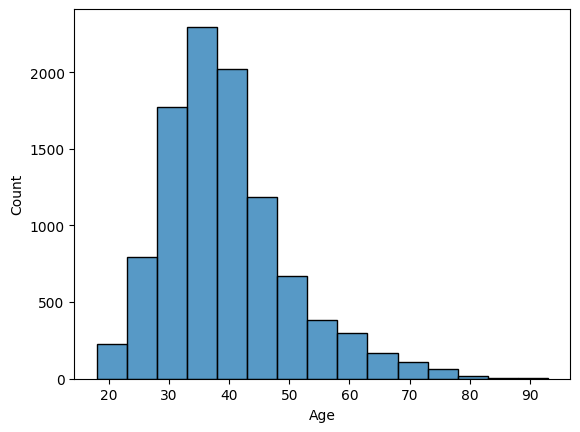

In [47]:
sns.histplot(df, x = 'Age', bins = 15, binwidth=5)

<Axes: xlabel='Exited', ylabel='Age'>

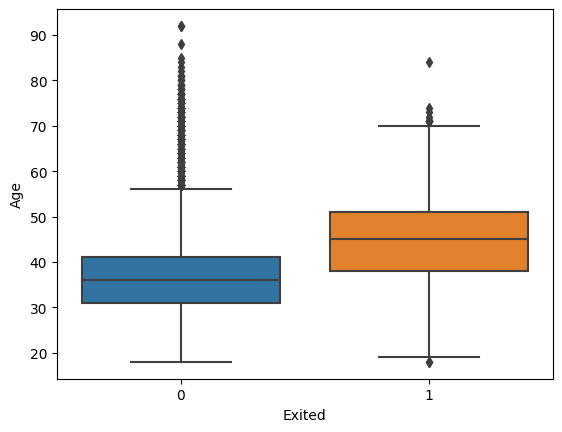

In [19]:
sns.boxplot(df, x = 'Exited', y = 'Age')

<Axes: xlabel='Tenure', ylabel='count'>

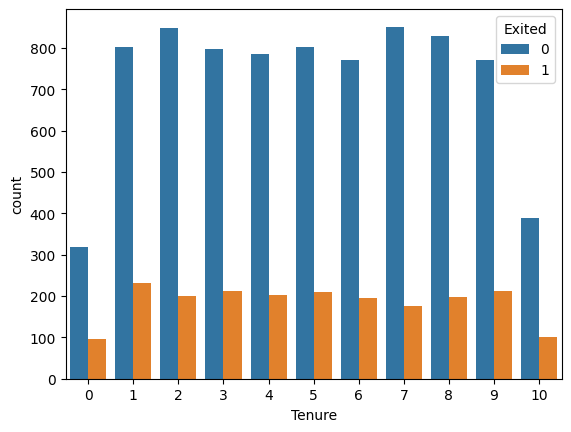

In [32]:
sns.countplot(df, x = 'Tenure', hue = 'Exited')

<Axes: xlabel='Exited', ylabel='Balance'>

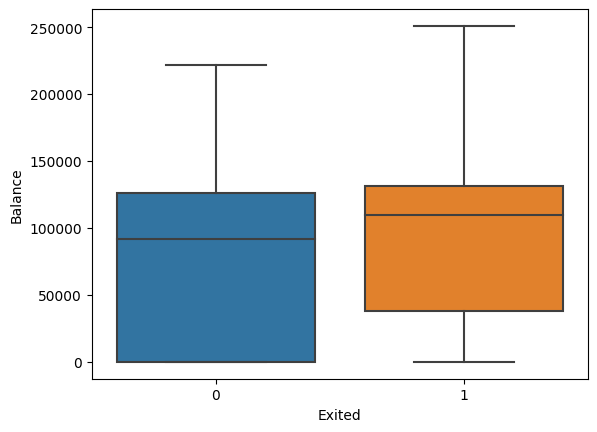

In [31]:
sns.boxplot(df, x = 'Exited', y = 'Balance')

<Axes: xlabel='NumOfProducts', ylabel='count'>

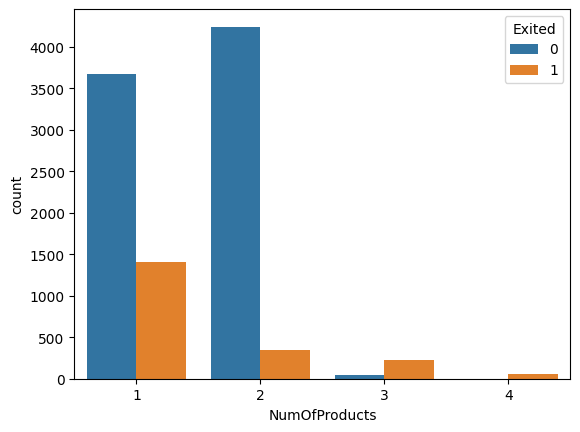

In [33]:
sns.countplot(df, x = 'NumOfProducts', hue = 'Exited')

<Axes: xlabel='HasCrCard', ylabel='count'>

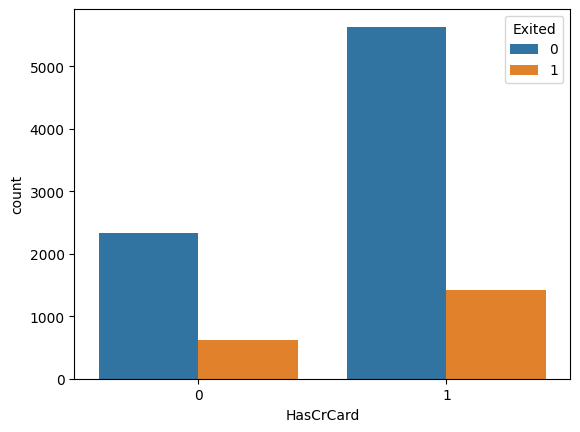

In [36]:
sns.countplot(df, x = 'HasCrCard', hue = 'Exited')

<Axes: xlabel='IsActiveMember', ylabel='count'>

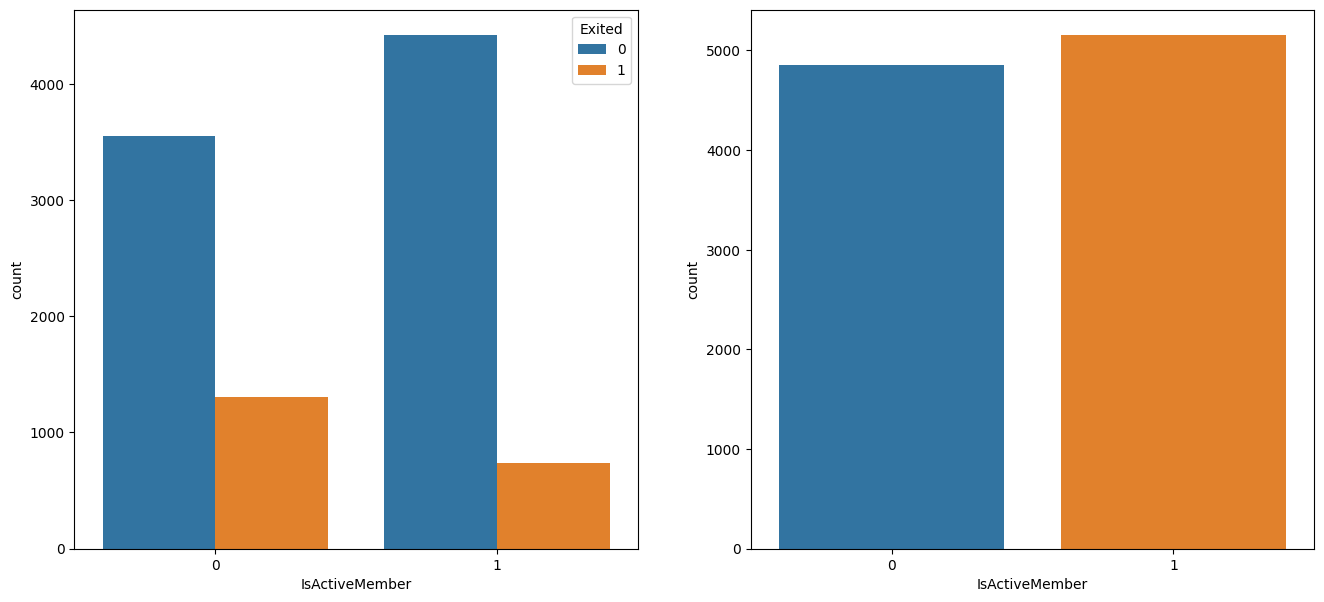

In [42]:
plt.figure(figsize = (16, 7))
plt.subplot(121)
sns.countplot(df, x = 'IsActiveMember',hue = 'Exited')
plt.subplot(122)
sns.countplot(df, x = 'IsActiveMember')


<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

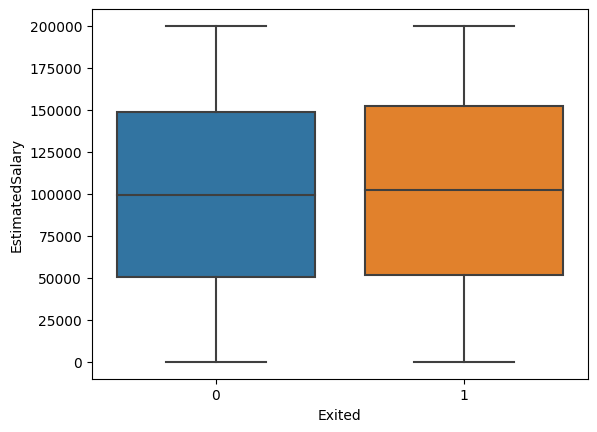

In [43]:
sns.boxplot(df, x = 'Exited', y ='EstimatedSalary')

In [61]:
X = df.drop(['CustomerId', 'Surname', 'CreditScore', 'EstimatedSalary'], axis = 1)
y = df.Exited

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size= .2, random_state = 32)
X_train.shape, X_test.shape

((8000, 9), (2000, 9))

In [102]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

for i in X_train.select_dtypes('object').columns:
    X_train[i] = lb.fit_transform(X_train[i])
    X_test[i] = lb.transform(X_test[i])
X_train

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
RowNumber,,,,,,,,,
4005,2,0,41,4,0.00,2,0,1,0
9122,0,0,40,0,0.00,1,1,0,0
1801,0,0,59,3,0.00,2,1,1,0
1082,2,0,35,8,0.00,1,1,0,0
8231,1,1,32,4,162657.64,2,1,1,0
...,...,...,...,...,...,...,...,...,...
8445,0,0,70,3,0.00,2,1,1,0
7572,0,1,52,8,79475.30,3,1,1,1
4031,2,0,42,6,0.00,1,1,1,0


In [103]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train['Balance'] = ss.fit_transform(X_train['Balance'].values.reshape(-1, 1))
X_test['Balance'] = ss.fit_transform(X_test['Balance'].values.reshape(-1, 1))
X_train

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
RowNumber,,,,,,,,,
4005,2,0,41,4,-1.225139,2,0,1,0
9122,0,0,40,0,-1.225139,1,1,0,0
1801,0,0,59,3,-1.225139,2,1,1,0
1082,2,0,35,8,-1.225139,1,1,0,0
8231,1,1,32,4,1.381996,2,1,1,0
...,...,...,...,...,...,...,...,...,...
8445,0,0,70,3,-1.225139,2,1,1,0
7572,0,1,52,8,0.048719,3,1,1,1
4031,2,0,42,6,-1.225139,1,1,1,0


In [111]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


In [159]:
model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train,epochs=5)


Epoch 1/5
250/250 [==============================] - 1s 2ms/step - loss: 0.5628 - accuracy: 0.7947
Epoch 2/5
250/250 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.7975
Epoch 3/5
250/250 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.8622
Epoch 4/5
250/250 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.9889
Epoch 5/5
250/250 [==============================] - 0s 2ms/step - loss: 0.0927 - accuracy: 0.9925


In [160]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred

63/63 [==============================] - 0s 1ms/step


array([0, 1, 0, ..., 1, 1, 0])

<Axes: >

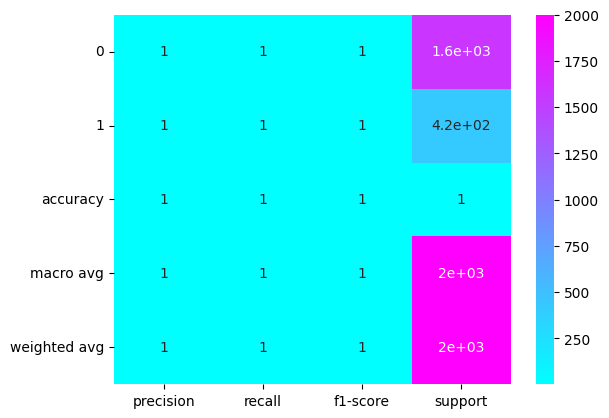

In [161]:
from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred, output_dict = True)).transpose(), annot=True, cmap = 'cool')

Text(50.722222222222214, 0.5, 'True')

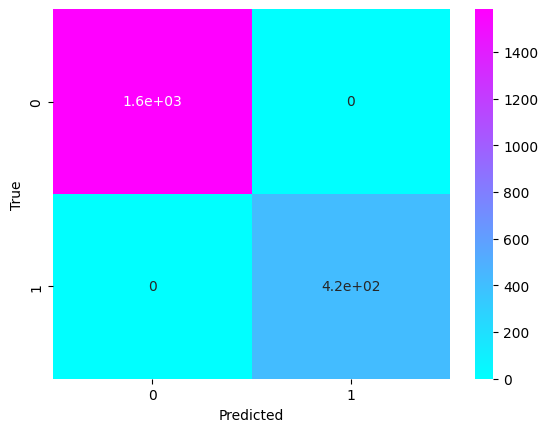

In [163]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap = 'cool')
plt.xlabel('Predicted')
plt.ylabel('True')